<a href="https://colab.research.google.com/github/wesleyc00/processamento-digital-de-imagens/blob/main/tarefa01_pdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PASSO 1: Usando o padrão CFA (Color Filter Array) transformar a imagem RGB em um mosaico.

Text(0.5, 1.0, 'Imagem Original')

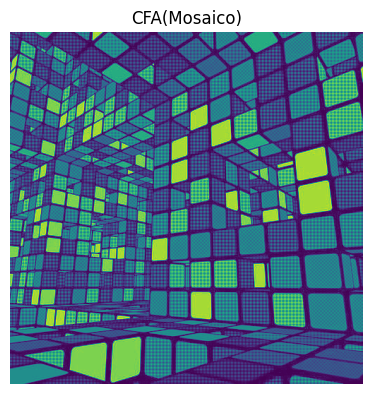

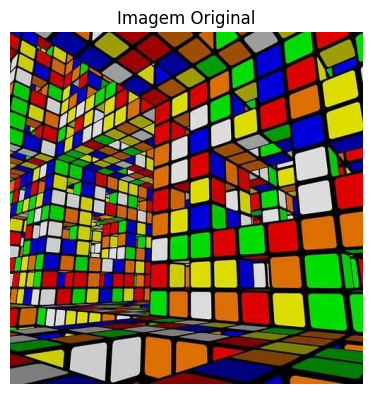

In [21]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def gerar_mosaico_cfa(imagem_rgb):

    altura, largura, _ = imagem_rgb.shape
    mosaico = np.zeros((altura, largura), dtype=np.uint8)

    # Padrão CFA (Bayer RGGB)
    for y in range(altura):
        for x in range(largura):
            if y % 2 == 0:
                if x % 2 == 0:
                    mosaico[y, x] = imagem_rgb[y, x, 0]  # Vermelho (R) nas posições pares de linhas pares
                else:
                    mosaico[y, x] = imagem_rgb[y, x, 1]  # Verde (G) nas posições ímpares de linhas pares
            else:
                if x % 2 == 0:
                    mosaico[y, x] = imagem_rgb[y, x, 1]  # Verde (G) nas posições pares de linhas ímpares
                else:
                    mosaico[y, x] = imagem_rgb[y, x, 2]  # Azul (B) nas posições ímpares de linhas ímpares

    return mosaico

# Exemplo de uso:
# Carregar uma imagem RGB
imagem_rgb = np.array(Image.open("/content/cubo.1.jpg"))

# Gerar o mosaico CFA com padrão Bayer RGGB
mosaico_cfa = gerar_mosaico_cfa(imagem_rgb)

# Salvar o mosaico como uma imagem
Image.fromarray(mosaico_cfa).save("mosaico_cfa_bayer.jpg")

# Exibir o mosaico CFA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mosaico_cfa)
plt.axis('off')
plt.title('CFA(Mosaico)')

# Exibir imagem original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_rgb)
plt.axis('off')
plt.title('Imagem Original')


# PASSO 2: Interpolar o mosaico.

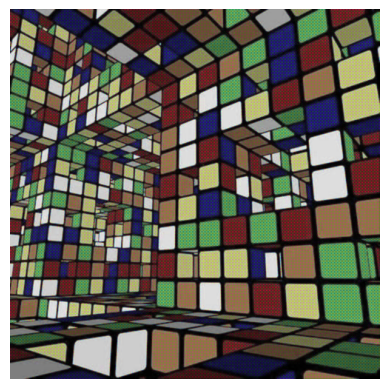

In [22]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

def interpolar_cfa(mosaico_cfa):

    altura, largura = mosaico_cfa.shape
    imagem_interpolada = np.zeros((altura, largura, 3), dtype=np.uint8)

    # Padrão Bayer RGGB
    for y in range(altura):
        for x in range(largura):
            if y % 2 == 0:
                if x % 2 == 0:
                    # Pixel Vermelho (R)
                    imagem_interpolada[y, x, 0] = mosaico_cfa[y, x]  # R
                    # Interpolar verde (G) e azul (B)
                    imagem_interpolada[y, x, 1] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # G
                    imagem_interpolada[y, x, 2] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # B
                else:
                    # Pixel Verde (G) em linhas pares
                    imagem_interpolada[y, x, 1] = mosaico_cfa[y, x]  # G
                    # Interpolar vermelho (R) e azul (B)
                    imagem_interpolada[y, x, 0] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # R
                    imagem_interpolada[y, x, 2] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # B
            else:
                if x % 2 == 0:
                    # Pixel Verde (G) em linhas ímpares
                    imagem_interpolada[y, x, 1] = mosaico_cfa[y, x]  # G
                    # Interpolar vermelho (R) e azul (B)
                    imagem_interpolada[y, x, 0] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # R
                    imagem_interpolada[y, x, 2] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # B
                else:
                    # Pixel Azul (B)
                    imagem_interpolada[y, x, 2] = mosaico_cfa[y, x]  # B
                    # Interpolar vermelho (R) e verde (G)
                    imagem_interpolada[y, x, 0] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # R
                    imagem_interpolada[y, x, 1] = np.mean(mosaico_cfa[max(y-1, 0):min(y+2, altura), max(x-1, 0):min(x+2, largura)])  # G

    return imagem_interpolada

# Exemplo de uso:
# Carregar a imagem do mosaico CFA gerado anteriormente
mosaico_cfa = np.array(Image.open("mosaico_cfa_bayer.jpg"))

# Realizar a interpolação
imagem_interpolada = interpolar_cfa(mosaico_cfa)

# Salvar a imagem interpolada como uma nova imagem RGB
Image.fromarray(imagem_interpolada).save("imagem_interpolada_rgb.jpg")

# Exibir a imagem interpolada RGB
plt.imshow(imagem_interpolada)
plt.axis('off')
plt.show()

# Calcular o MSE

In [23]:
import numpy as np
from PIL import Image

def calcular_mse(imagem1, imagem2):

    # Verificar se as imagens têm as mesmas dimensões
    assert imagem1.shape == imagem2.shape, "As imagens precisam ter as mesmas dimensões para calcular o MSE."

    # Calcular o MSE
    mse = np.mean((imagem1 - imagem2) ** 2)
    return mse

# Carregar as imagens
imagem_interpolada = np.array(Image.open("imagem_interpolada_rgb.jpg"))
imagem_mosaico = np.array(Image.open("mosaico_cfa_bayer.jpg"))

# Se a imagem do mosaico for em escala de cinza, converter para 3 canais (R, G, B) para poder comparar com a imagem RGB
if len(imagem_mosaico.shape) == 2:
    imagem_mosaico = np.stack([imagem_mosaico] * 3, axis=-1)  # Converter para 3 canais duplicando a escala de cinza

# Calcular o MSE entre as duas imagens
mse = calcular_mse(imagem_interpolada, imagem_mosaico)

print(f"O MSE entre a imagem interpolada e o mosaico CFA é: {mse:.2f}")


O MSE entre a imagem interpolada e o mosaico CFA é: 87.60
